### Collecting Data

In [1]:
import zipfile
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%cd D:/SELF/ML/aksara-detection/code/findingbali/dataset

D:\SELF\ML\aksara-detection\code\findingbali\dataset


In [3]:
ls

 Volume in drive D is DATA
 Volume Serial Number is 7C83-01D2

 Directory of D:\SELF\ML\aksara-detection\code\findingbali\dataset

14/12/2023  03:49    <DIR>          .
14/12/2023  15:19    <DIR>          ..
14/12/2023  03:49    <DIR>          Adeg-Adeg
14/12/2023  03:49    <DIR>          Ba
14/12/2023  03:49    <DIR>          Bisah
14/12/2023  03:49    <DIR>          Ca
14/12/2023  03:49    <DIR>          Cecek
14/12/2023  03:49    <DIR>          Da
14/12/2023  03:49    <DIR>          Delapan
14/12/2023  03:49    <DIR>          Dua
14/12/2023  03:49    <DIR>          Empat
14/12/2023  03:49    <DIR>          Enam
14/12/2023  03:49    <DIR>          Ga
14/12/2023  03:49    <DIR>          Gantungan Ba
14/12/2023  03:49    <DIR>          Gantungan Ca
14/12/2023  03:49    <DIR>          Gantungan Da
14/12/2023  03:49    <DIR>          Gantungan Ga
14/12/2023  03:49    <DIR>          Gantungan Ha
14/12/2023  03:49    <DIR>          Gantungan Ja
14/12/2023  03:49    <DIR>          Gantungan

In [4]:
source_path_ha = 'D:/SELF/ML/aksara-detection/code/findingbali/dataset/Ha'
source_path_na = 'D:/SELF/ML/aksara-detection/code/findingbali/dataset/Na'
source_path_ca = 'D:/SELF/ML/aksara-detection/code/findingbali/dataset/Ca'
source_path_ra = 'D:/SELF/ML/aksara-detection/code/findingbali/dataset/Ra'
source_path_ka = 'D:/SELF/ML/aksara-detection/code/findingbali/dataset/Ka'

print(f"There are {len(os.listdir(source_path_ha))} images of Ha.")
print(f"There are {len(os.listdir(source_path_na))} images of Na.")
print(f"There are {len(os.listdir(source_path_ca))} images of Ca.")
print(f"There are {len(os.listdir(source_path_ra))} images of Ra.")
print(f"There are {len(os.listdir(source_path_ka))} images of Ka.")

There are 76 images of Ha.
There are 89 images of Na.
There are 78 images of Ca.
There are 64 images of Ra.
There are 84 images of Ka.


### Making Models

In [5]:
TRAINING_DIR="D:/SELF/ML/aksara-detection/code/findingbali/dataset"
VALIDATION_DIR="D:/SELF/ML/aksara-detection/code/findingbali/dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator= train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training')

num_train_data = train_generator.samples
print("Train dataset:", num_train_data)

validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

num_val_data = validation_generator.samples
print("Validation dataset:", num_val_data)

Found 2897 images belonging to 55 classes.
Train dataset: 2897
Found 1209 images belonging to 55 classes.
Validation dataset: 1209


In [6]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Adeg-Adeg
1 : Ba
2 : Bisah
3 : Ca
4 : Cecek
5 : Da
6 : Delapan
7 : Dua
8 : Empat
9 : Enam
10 : Ga
11 : Gantungan Ba
12 : Gantungan Ca
13 : Gantungan Da
14 : Gantungan Ga
15 : Gantungan Ha
16 : Gantungan Ja
17 : Gantungan Ka
18 : Gantungan La
19 : Gantungan Ma
20 : Gantungan Na
21 : Gantungan Nga
22 : Gantungan Nya
23 : Gantungan Pa
24 : Gantungan Ra
25 : Gantungan Sa
26 : Gantungan Ta
27 : Gantungan Wa
28 : Gantungan Ya
29 : Ha
30 : Ja
31 : Ka
32 : La
33 : Lima
34 : Ma
35 : Na
36 : Nga
37 : Nya
38 : Pa
39 : Pepet
40 : Ra
41 : Sa
42 : Satu
43 : Sembilan
44 : Suku
45 : Surang
46 : Ta
47 : Taleng
48 : Taleng Tedong
49 : Tedong
50 : Tiga
51 : Tujuh
52 : Ulu
53 : Wa
54 : Ya


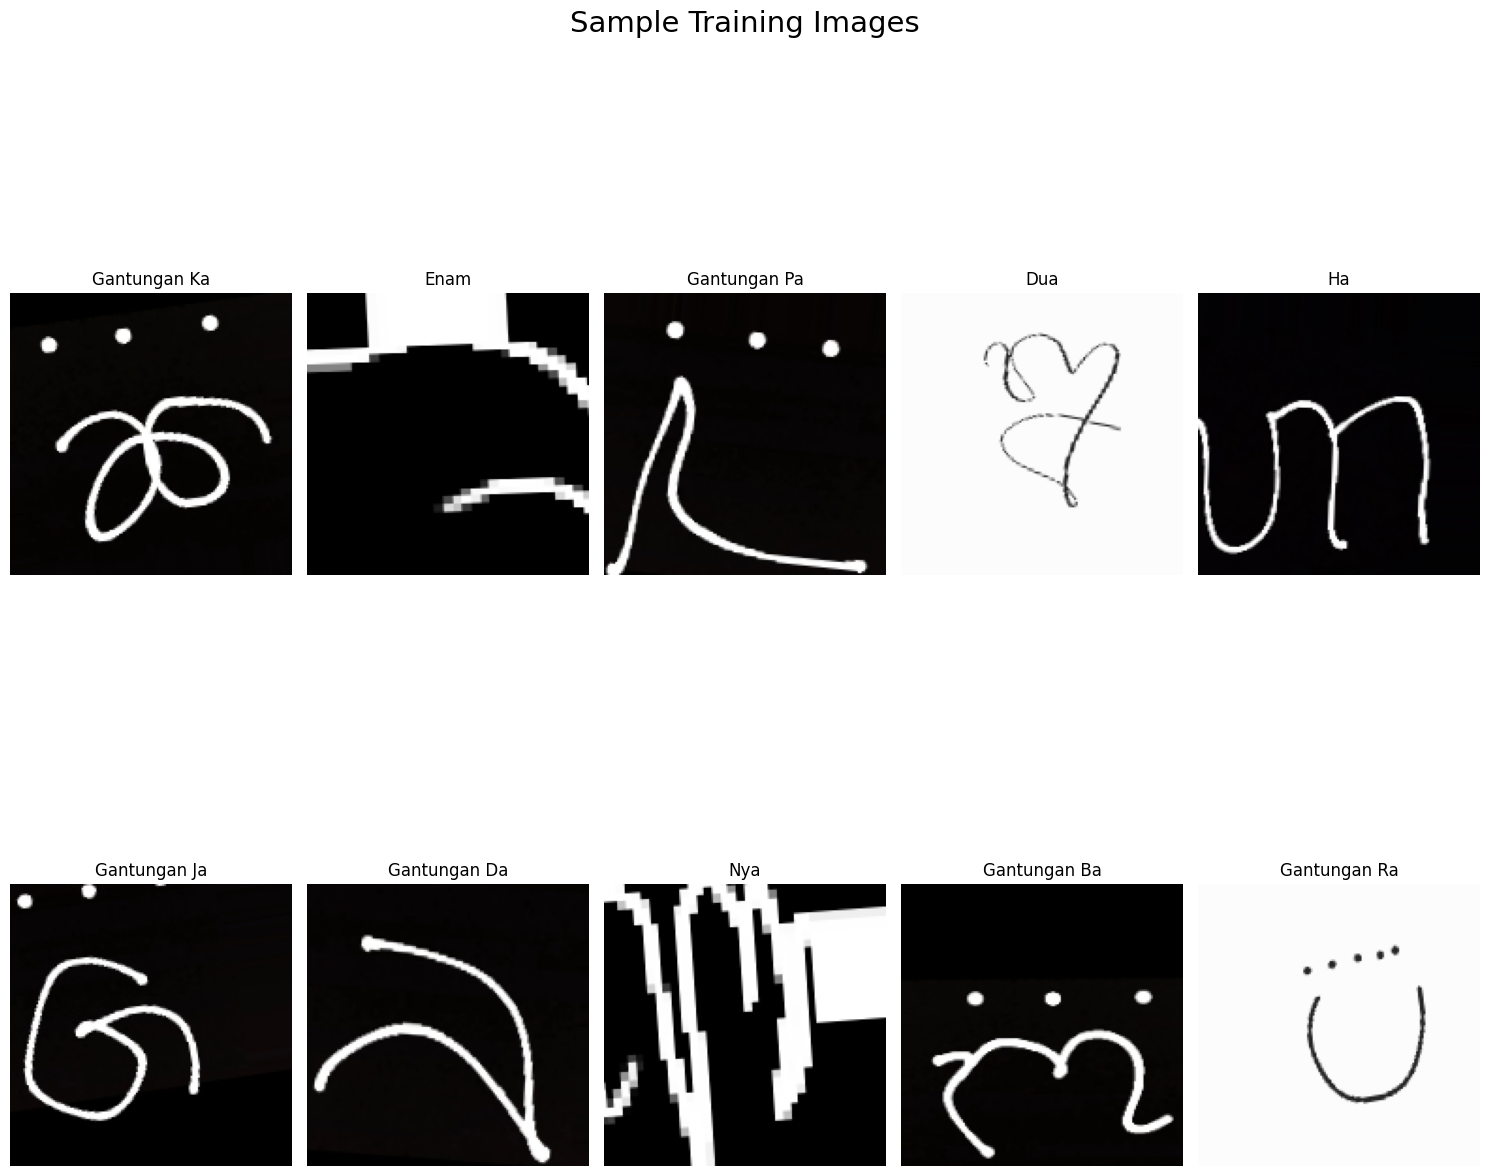

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 15))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [18]:
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    tf.keras.layers.Dense(55, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),  # Adjust learning rate
    metrics=['accuracy']
)

In [19]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [20]:

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] >0.90 and logs['val_accuracy'] >0.90:
            print("\nThe process will stop because it has reached the target.")
            self.model.stop_training = True

callback = CustomCallback()

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['accuracy']
)


history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=400,
        callbacks = [callback]
    )

Epoch 1/400
46/46 [==============================] - 18s 372ms/step - loss: 20.3385 - accuracy: 0.0466 - val_loss: 19.3527 - val_accuracy: 0.0546
Epoch 2/400
46/46 [==============================] - 17s 376ms/step - loss: 18.7695 - accuracy: 0.0956 - val_loss: 18.3434 - val_accuracy: 0.0612
Epoch 3/400
46/46 [==============================] - 18s 380ms/step - loss: 17.6471 - accuracy: 0.1305 - val_loss: 17.4191 - val_accuracy: 0.0968
Epoch 4/400
46/46 [==============================] - 18s 384ms/step - loss: 16.6767 - accuracy: 0.1816 - val_loss: 16.5339 - val_accuracy: 0.1588
Epoch 5/400
46/46 [==============================] - 18s 378ms/step - loss: 15.8537 - accuracy: 0.2144 - val_loss: 15.7790 - val_accuracy: 0.1737
Epoch 6/400
46/46 [==============================] - 18s 385ms/step - loss: 15.0679 - accuracy: 0.2765 - val_loss: 15.0907 - val_accuracy: 0.2324
Epoch 7/400
46/46 [==============================] - 18s 389ms/step - loss: 14.4435 - accuracy: 0.2844 - val_loss: 14.4408 -

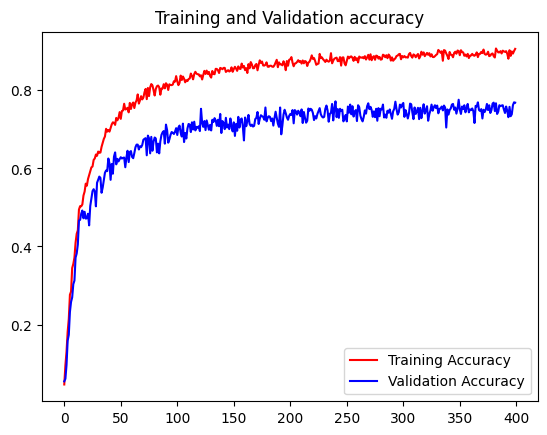

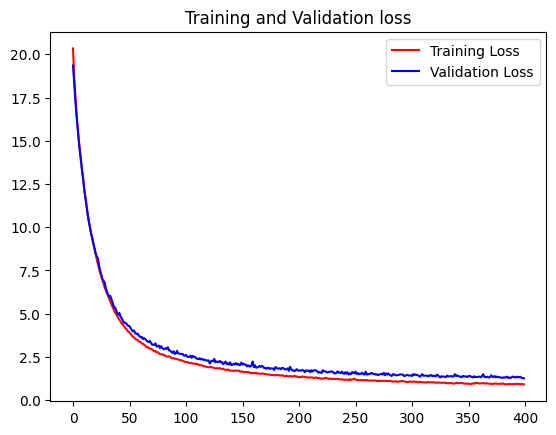

In [21]:
%matplotlib inline

import matplotlib.image as mping
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc = 'best')
plt.show()

In [22]:
model.save("D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali5.h5")

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali5.h5")

# Function to classify the input image
def classify_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = prediction[0][class_index]

    return class_index, confidence

# Update the labels dictionary with class mappings
labels = {
    0: 'Adeg-Adeg',
    1: 'Ba',
    2: 'Bisah',
    3: 'Ca',
    4: 'Cecek',
    5: 'Da',
    6: 'Delapan',
    7: 'Dua',
    8: 'Empat',
    9: 'Enam',
    10: 'Ga',
    11: 'Gantungan Ba',
    12: 'Gantungan Ca',
    13: 'Gantungan Da',
    14: 'Gantungan Ga',
    15: 'Gantungan Ha',
    16: 'Gantungan Ja',
    17: 'Gantungan Ka',
    18: 'Gantungan La',
    19: 'Gantungan Ma',
    20: 'Gantungan Na',
    21: 'Gantungan Nga',
    22: 'Gantungan Nya',
    23: 'Gantungan Pa',
    24: 'Gantungan Ra',
    25: 'Gantungan Sa',
    26: 'Gantungan Ta',
    27: 'Gantungan Wa',
    28: 'Gantungan Ya',
    29: 'Ha',
    30: 'Ja',
    31: 'Ka',
    32: 'La',
    33: 'Lima',
    34: 'Ma',
    35: 'Na',
    36: 'Nga',
    37: 'Nya',
    38: 'Pa',
    39: 'Pepet',
    40: 'Ra',
    41: 'Sa',
    42: 'Satu',
    43: 'Sembilan',
    44: 'Suku',
    45: 'Surang',
    46: 'Ta',
    47: 'Taleng',
    48: 'Taleng Tedong',
    49: 'Tedong',
    50: 'Tiga',
    51: 'Tujuh',
    52: 'Ulu',
    53: 'Wa',
    54: 'Ya'
}



### Checking Models

In [25]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Cecek.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 329ms/step
The photo belongs to class 'Cecek' with confidence 0.93


In [31]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Da.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 19ms/step
The photo belongs to class 'Gantungan Ja' with confidence 0.46


In [33]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Enam.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 16ms/step
The photo belongs to class 'Enam' with confidence 0.89


In [34]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ka.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 20ms/step
The photo belongs to class 'Na' with confidence 0.60


In [50]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ta.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 16ms/step
The photo belongs to class 'Da' with confidence 0.27


In [49]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ya.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Gantungan Ya' with confidence 1.00


In [48]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ka.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 22ms/step
The photo belongs to class 'Ka' with confidence 1.00


In [47]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ma.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 16ms/step
The photo belongs to class 'Lima' with confidence 0.60


In [43]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Na.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 14ms/step
The photo belongs to class 'Na' with confidence 0.62


In [42]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Pepet.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Pepet' with confidence 0.98


In [41]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Suku.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Suku' with confidence 1.00


In [40]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ta.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Ta' with confidence 0.78


In [39]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ulu.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 15ms/step
The photo belongs to class 'Ulu' with confidence 0.72


In [38]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ya.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 25ms/step
The photo belongs to class 'Ya' with confidence 1.00


### Saving Models

In [ ]:
model_json = model.to_json()
with open("aksarabali5.json", "w") as json_file:
    json_file.write(model_json)

model.save("/content/gdrive/MyDrive/aksarabali5.json")